In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Amazon Sales.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  Amount              128975 non-nul

In [ ]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [ ]:

df.fillna("unknown", inplace=True)


In [ ]:
# Total Revenue
total_revenue = df['Amount'].sum()
print(total_revenue)

78592678.29999998


In [ ]:
# Average Order Value (AOV)
aov = df['Amount'].sum() / df['Order ID'].nunique()
print(aov)

652.8824062536343


In [ ]:
total_orders = df['Order ID'].nunique()
print(total_orders)

120378


In [ ]:
avg_order_value = total_revenue / total_orders
print(avg_order_value)

652.8824062536343


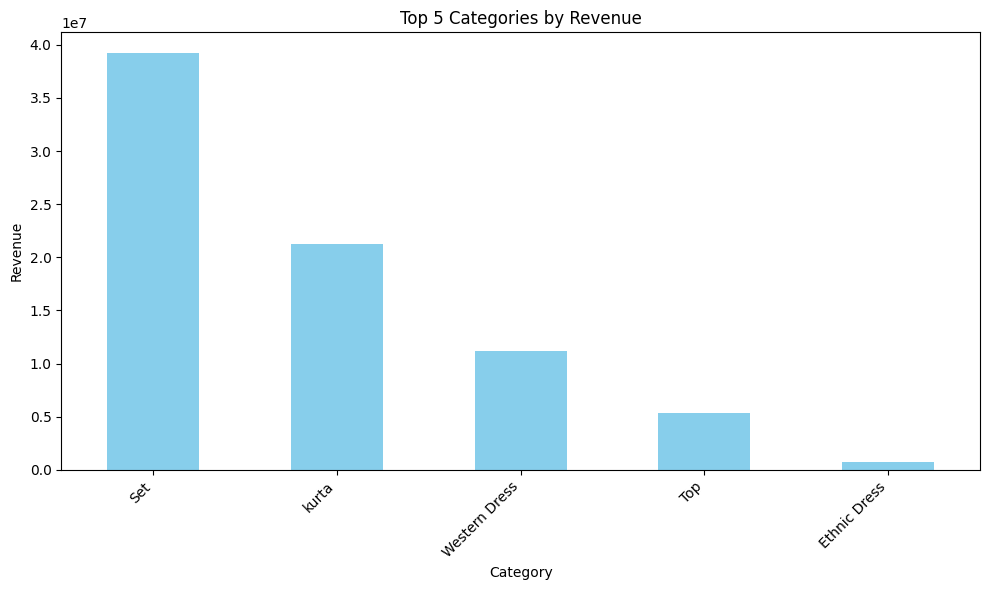

In [ ]:
category_revenue = df.groupby('Category')['Amount'].sum()
top_categories = category_revenue.sort_values(ascending=False)
topcategories = top_categories.head(5)
plt.figure(figsize=(10, 6))
topcategories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-16-585a7f501afe>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


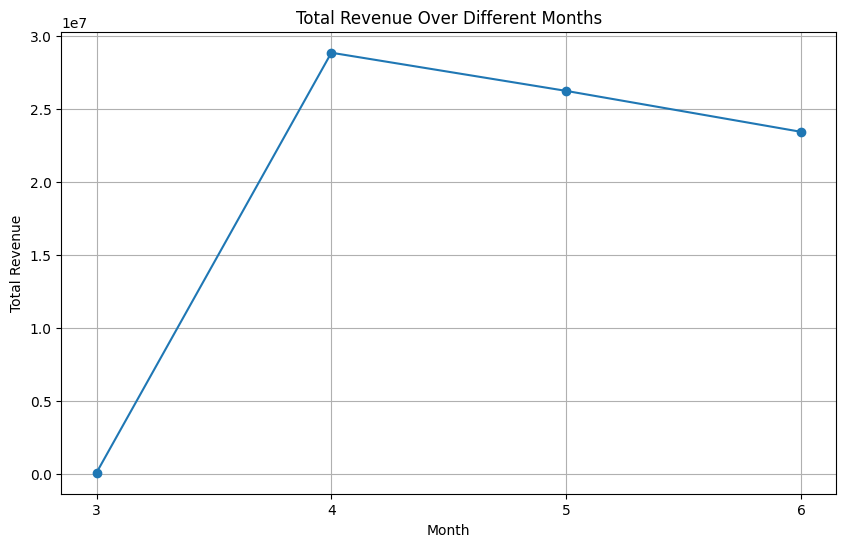

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_revenue = df.groupby('Month')['Amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Total Revenue Over Different Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(monthly_revenue.index)
plt.grid(True)
plt.show()


In [ ]:
revenue_by_size = df.groupby('Size')['Amount'].sum()
print(revenue_by_size)

Size
Small (0-100)         78592678.3
Medium (101-500)             0.0
Large (501-1000)             0.0
Very Large (1000+)           0.0
Name: Amount, dtype: float64


<ipython-input-22-5b08338fccf4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_size = df.groupby('Size')['Amount'].sum()


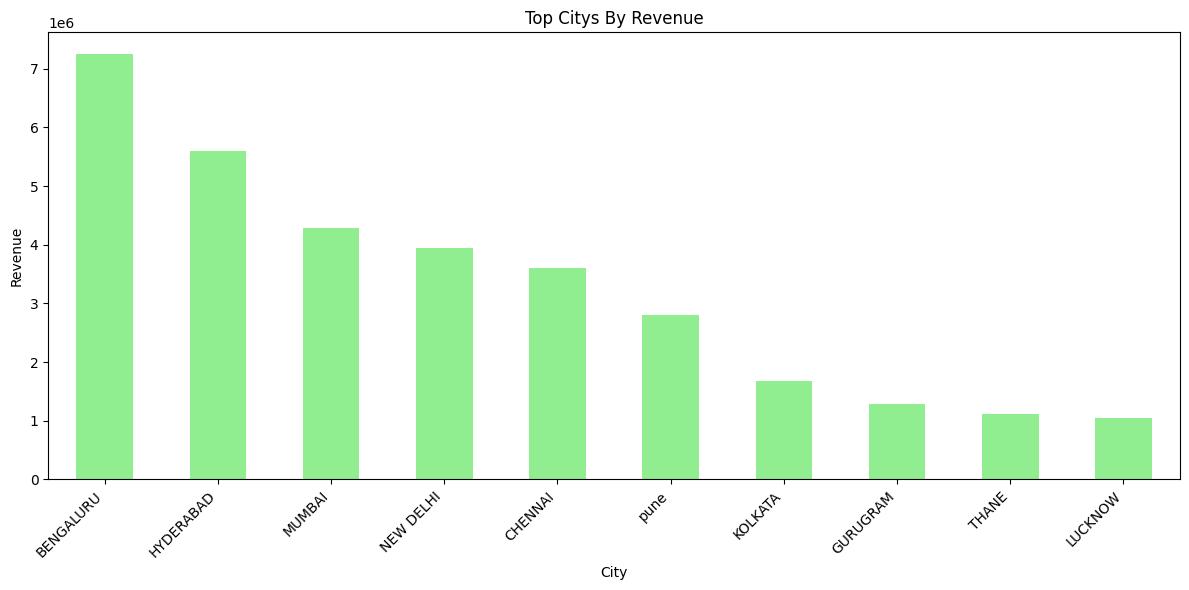

In [ ]:
city_revenue = df.groupby('ship-city')['Amount'].sum()
top_cities = city_revenue.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='lightgreen')
plt.title('Top Citys By Revenue')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


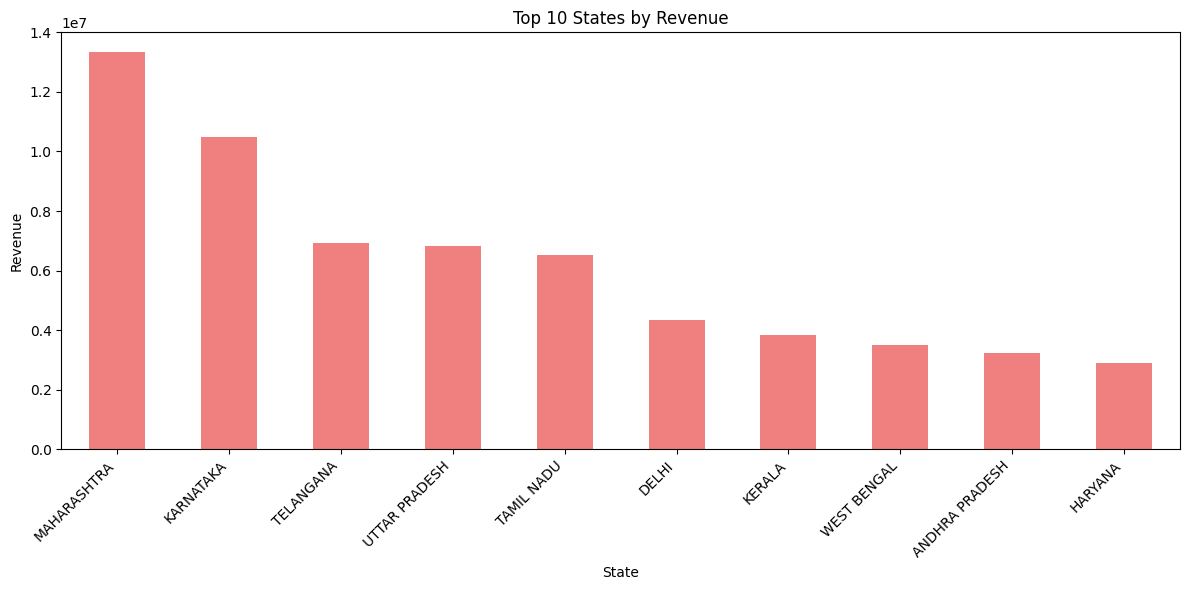

In [ ]:

state_revenue = df.groupby('ship-state')['Amount'].sum()
top_states = state_revenue.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', color='lightcoral')
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


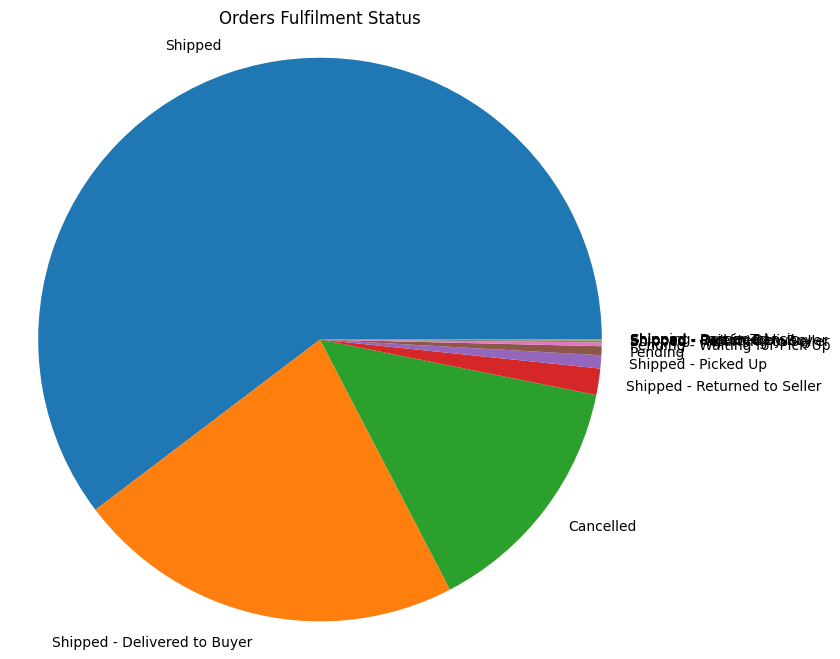

In [ ]:
order_status_counts = df['Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(order_status_counts, labels=order_status_counts.index)
plt.title('Orders Fulfilment Status')
plt.axis('equal')
plt.show()


<ipython-input-38-bb4263d47a0e>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


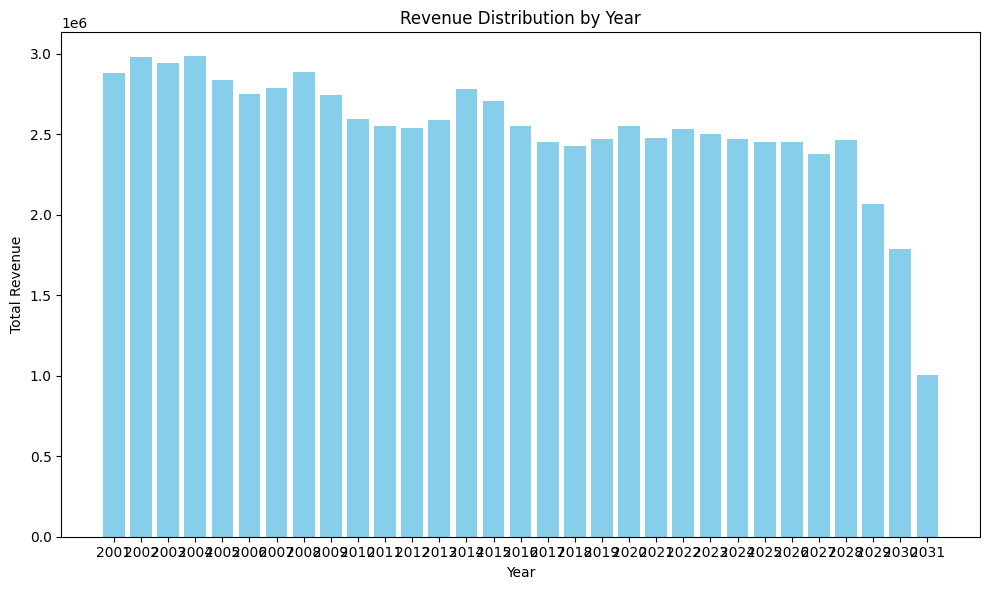

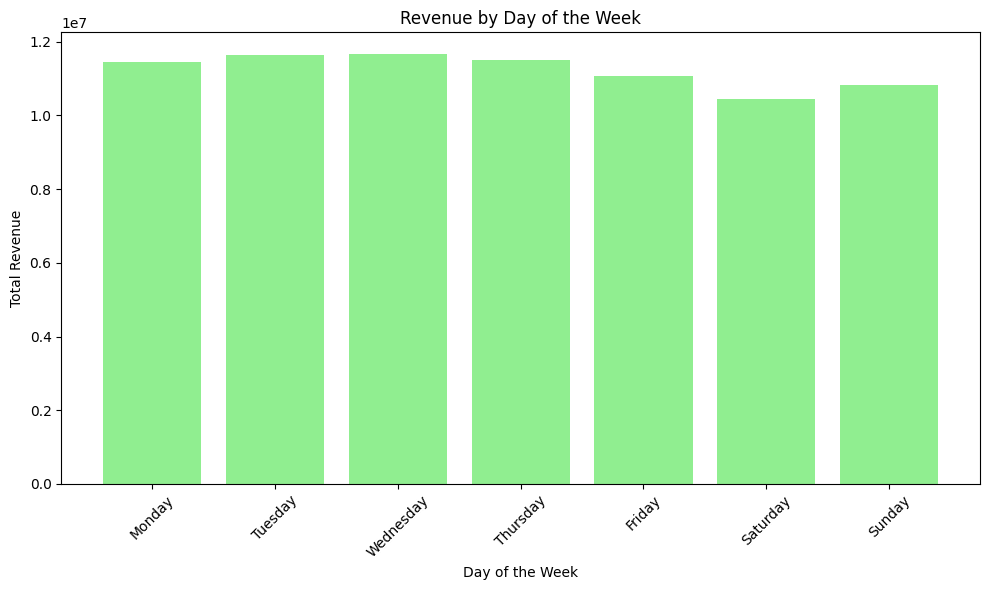

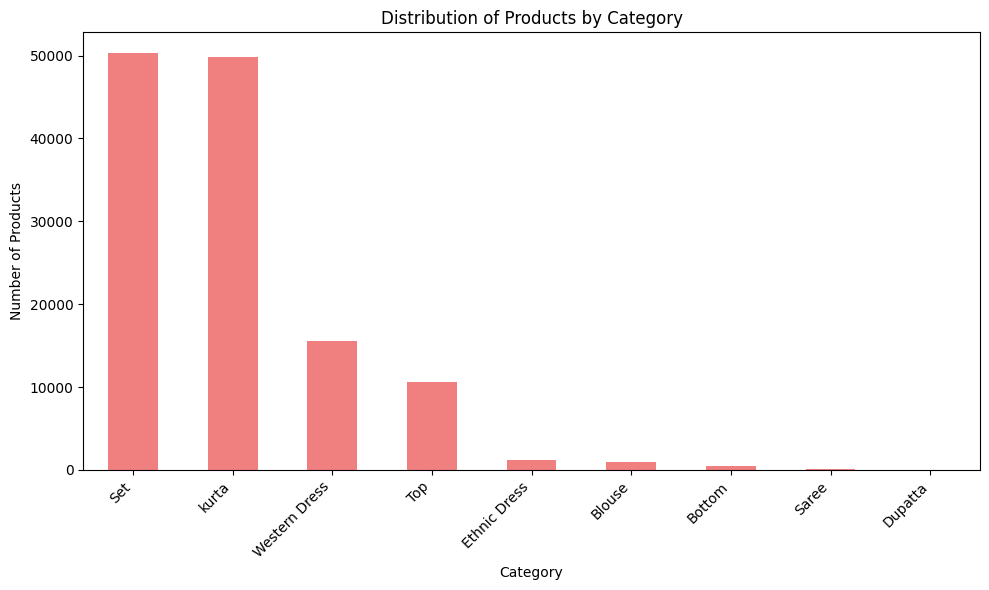

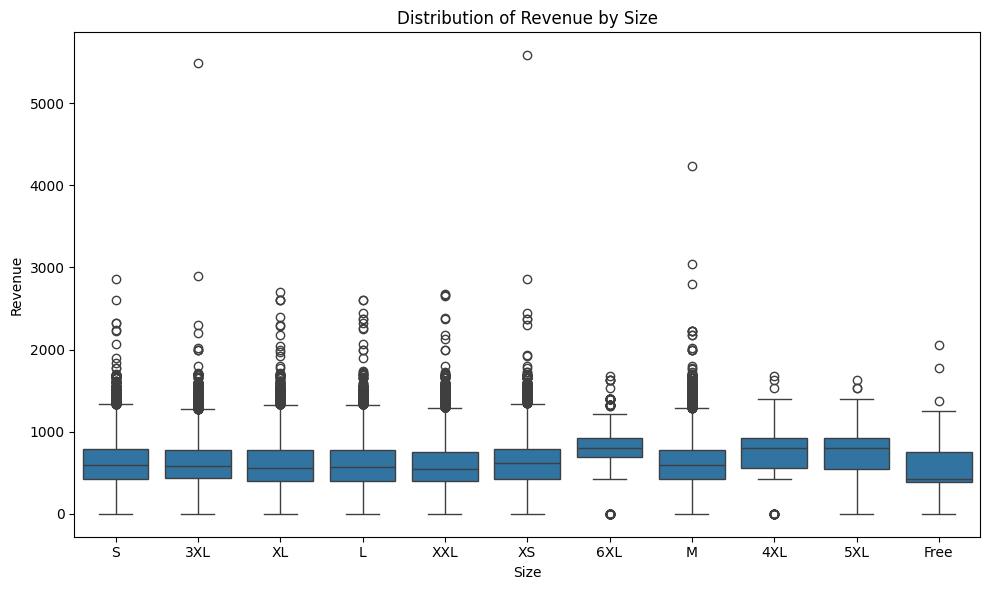

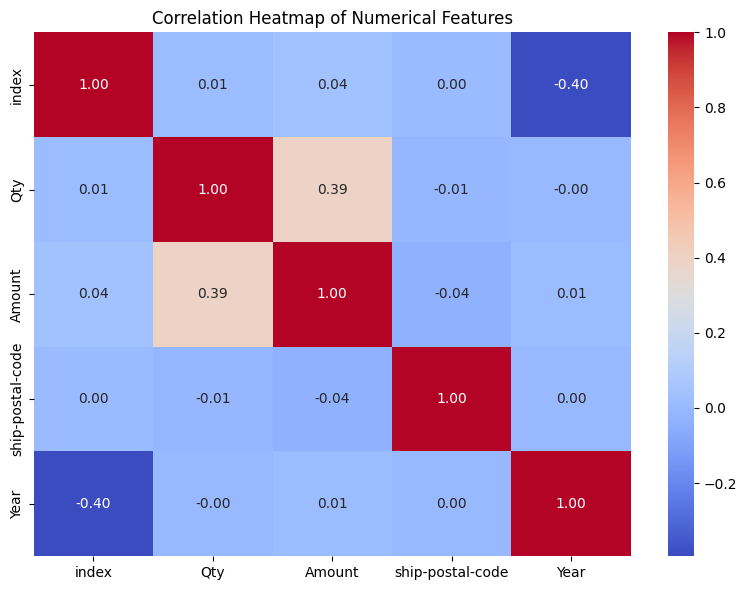

In [ ]:
df.fillna("unknown", inplace=True)
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year

# 1. Revenue Distribution by Year
yearly_revenue = df.groupby('Year')['Amount'].sum()
plt.figure(figsize=(10, 6))
plt.bar(yearly_revenue.index, yearly_revenue.values, color='skyblue')
plt.title('Revenue Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(yearly_revenue.index)
plt.tight_layout()
plt.show()

# 2. Revenue by Day of the Week
day_of_week_revenue = df.groupby('DayOfWeek')['Amount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_revenue.index, day_of_week_revenue.values, color='lightgreen')
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.  Category Distribution
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Distribution of Revenue by Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Size', y='Amount', data=df)
plt.title('Distribution of Revenue by Size')
plt.xlabel('Size')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()
